In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(['CustomerId','RowNumber','Surname'], axis = 1, inplace = True)

In [ ]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.shape

(10000, 11)

In [ ]:
df[df.Exited == '1']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


### data Visualization

In [ ]:
Exited_yes = df[df.Exited == '1'].Tenure
Exited_no = df[df.Exited == '0'].Tenure



/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


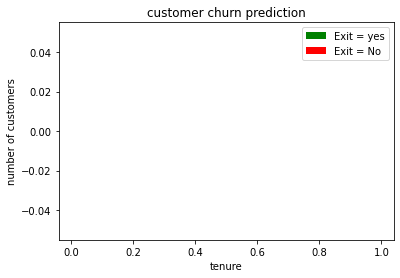

In [ ]:
plt.xlabel('tenure')
plt.ylabel('number of customers')
plt.title ('customer churn prediction')
plt.hist([Exited_no,Exited_yes], color =['green','red'], label = ['Exit = yes', 'Exit = No'])
plt.legend()

In [ ]:
def print_unique_col_values(df):
  for column in df : 
    if df[column].dtypes == 'object':
      print(f'{column}: {df[column].unique()}')

In [ ]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [ ]:
df['Gender'].replace({'Female':1,'Male':0}, inplace = True)

In [ ]:
df.Gender.unique()

array([1, 0])

In [ ]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [ ]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
9458,523,0,36,8,158351.02,2,1,0,155304.53,0,1,0,0
3531,408,1,84,8,87873.39,1,0,0,188484.52,1,1,0,0
4216,794,0,56,9,96951.21,1,1,1,71776.76,0,1,0,0
3228,583,1,29,10,0.00,2,1,1,111285.85,0,1,0,0
2644,736,0,27,5,51522.75,1,0,1,192131.77,0,1,0,0


In [ ]:
col_to_scale = ['Tenure','CreditScore','Balance','EstimatedSalary','Age','NumOfProducts']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[col_to_scale] = scaler.fit_transform(df1[col_to_scale])

In [ ]:
for col in df1:
  print(f'{col}:{df1[col].unique()}')

CreditScore:[0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.43

In [ ]:
X = df1.drop('Exited', axis='columns')
y = df1['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
X_train.shape

(8000, 12)

In [ ]:
X_test.shape

(2000, 12)

In [ ]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,1,0.283784,0.6,0.000000,0.333333,0,0,0.096273,0,0,1
4154,0.752,0,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0,0
3881,0.476,1,0.621622,0.3,0.000000,0.000000,1,1,0.948551,1,0,0
9238,0.846,1,0.432432,0.4,0.000000,0.333333,1,0,0.646869,1,0,0
5210,0.402,0,0.229730,0.7,0.517012,0.333333,0,0,0.434670,1,0,0
7487,0.602,1,0.513514,0.4,0.000000,0.000000,0,0,0.421898,1,0,0
7542,0.314,1,0.216216,0.4,0.000000,0.333333,1,1,0.303413,0,0,1
7524,0.620,1,0.297297,0.8,0.666330,0.000000,1,1,0.925815,1,0,0
9412,0.750,0,0.108108,0.6,0.393324,0.000000,0,0,0.668609,1,0,0
6377,0.684,0,0.202703,0.9,0.000000,0.000000,1,0,0.567526,1,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[1541   54]
 [ 333   72]]


In [ ]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

Accuracy :  0.8065


In [ ]:
Build ANN in tensorflow/keras

### Build ANN in tensorflow/keras

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([keras.layers.Dense(12, input_shape=(12,),activation = 'relu'),
                          keras.layers.Dense(6, activation = 'relu'),
                          keras.layers.Dense(1, activation = 'sigmoid')
                          ])


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4401 - accuracy: 0.8129
Epoch 2/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.8136
Epoch 3/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4301 - accuracy: 0.8161
Epoch 4/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4245 - accuracy: 0.8175
Epoch 5/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4193 - accuracy: 0.8170
Epoch 6/20
250/250 [==============================] - 0s 914us/step - loss: 0.4120 - accuracy: 0.8166
Epoch 7/20
250/250 [==============================] - 0s 944us/step - loss: 0.4034 - accuracy: 0.8239
Epoch 8/20
250/250 [==============================] - 0s 915us/step - loss: 0.3944 - accuracy: 0.8282
Epoch 9/20
250/250 [==============================] - 0s 944us/step - loss: 0.3864 - accuracy: 0.8329
Epoch 10/20
250/250 [==============================] - 0s 914us/step - loss: 0.3784 - accura

In [ ]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 911us/step - loss: 0.3627 - accuracy: 0.8480


[0.36274102330207825, 0.8479999899864197]

In [ ]:
yp = model.predict(X_test)

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
       y_pred.append(1)
    else:
      y_pred.append(0)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.71      0.41      0.52       405

    accuracy                           0.85      2000
   macro avg       0.79      0.69      0.72      2000
weighted avg       0.84      0.85      0.83      2000

